# Big Data Real-Time Analytics with Python and Spark

## Chapter 4 - Case Study 3 - Exploratory Data Analysis and Data Wrangling to E-Commerce Analytics

**Note:** We are working in a big data science project divided in 3 chapters:
* **Exploratory data analysis** 
    - **EDA part 1**
    - **EDA part 2** 
* Attribute Engineering
* Data Preprocessing

![CaseStudy3 DSA](images/CaseStudy3.png "Case Study 3 DSA")

In [1]:
# Python Version
from platform import python_version
print("The version used in this notebook: ", python_version())

The version used in this notebook:  3.8.13


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
%reload_ext watermark
%watermark -a "Bianca Amorim" --iversions

Author: Bianca Amorim

pandas    : 1.4.2
seaborn   : 0.11.2
numpy     : 1.22.3
matplotlib: 3.4.3



In [4]:
# Global configuration parameters for the graphs
# Strategy in case you do not want to be setting parameters graph by graph
# If you want to creat all graphs with the same dimension, x and y configuration

from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

You can see more with:
https://matplotlib.org/stable/tutorials/introductory/customizing.html

## Loading dataset

In [5]:
df = pd.read_csv('datasets/dataset.csv')

In [6]:
df.shape

(11000, 12)

In [7]:
# We can see that anyone has nan values
# Attention because sometimes pandas does not recognize the righ data type
# But we can use this to starting point.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [8]:
# We can observe that each line represent an product 
# And we have categorical and numerical variables
df.head(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [9]:
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
359,360,F,Navio,4,3,131,5,baixa,M,6,1659,1
10767,10768,B,Navio,4,2,258,5,media,F,1,1010,0
1243,1244,F,Aviao,6,3,171,5,alta,M,61,1947,1
7952,7953,A,Aviao,6,5,276,4,baixa,M,9,1319,0
4220,4221,A,Caminhao,4,5,204,3,media,F,4,5476,0


In [10]:
df.tail(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
10995,10996,B,Navio,4,1,232,5,media,F,6,1247,0
10996,10997,C,Navio,5,4,242,5,baixa,F,4,1155,0
10997,10998,F,Navio,5,2,223,6,media,M,2,1210,0
10998,10999,D,Navio,2,5,155,5,baixa,F,6,1639,0
10999,11000,C,Navio,4,2,255,5,baixa,F,6,1739,0


# EDA - Part 1
#### Separation of Categorical and Numerical Variables

In [11]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [12]:
df.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

In [13]:
# List of the categorical variables
cats = ['corredor_armazem',
        'modo_envio',
        'prioridade_produto',
        'genero']

In [14]:
# List of the numerical variables
nums = ['numero_chamadas_cliente',
        'avaliacao_cliente',
        'custo_produto',
        'compras_anteriores',
        'desconto',
        'peso_gramas']

**Note:** 
- We dont include the **'ID'** because do not bring any information to analyse. Its only to indentificate the transactions from the number 1 until the 11000. 
- The variable **'entregue_no_prazo'** represents our target variable. All the preparation of the data will be based in this variable. We want to use these categorical and numerical variables to predict whether a product will be delivered on time. And this variable is not a numerical variable, is categorical and its represented with numbers (1 its positive class, indicates deliveries done on time, and 0 its the negative class, deliveries that were delayed. We could represent that with yes or no.

In [15]:
df['entregue_no_prazo'].value_counts()

1    6563
0    4437
Name: entregue_no_prazo, dtype: int64

In [16]:
target = ["entregue_no_prazo"]

## Exploring the Numerical Variables

In [17]:
# Summary of the numerical variables
df[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


**Some notes:** 

1. Columns `numero_cliente`, `avaliacao_cliente`, and `custo_produto` seems have a symmetric distribution (mean and median are not very different).
2. Columns `compras_anteriores`, `desconto` appear to be tilted to the right (mean > median).
3. The column `peso_gramas` appear to be tilted to the left (mean < median).

We can see the **count** is equal to all columns, which means that we do not have missing data (rows blank, empty ), but take care because we can have missing information for example the row can have a ‘?’. We will check it futher. 


<AxesSubplot:>

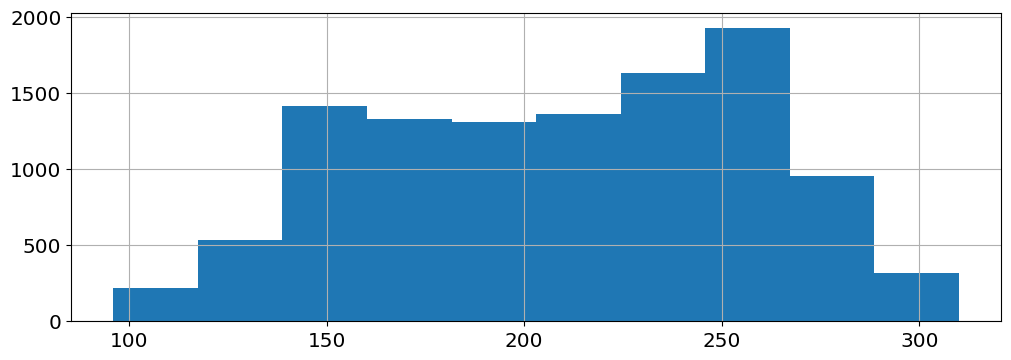

In [18]:
# If we can see if this afirmation above make sense we can create a histogram
df['custo_produto'].hist()

<AxesSubplot:>

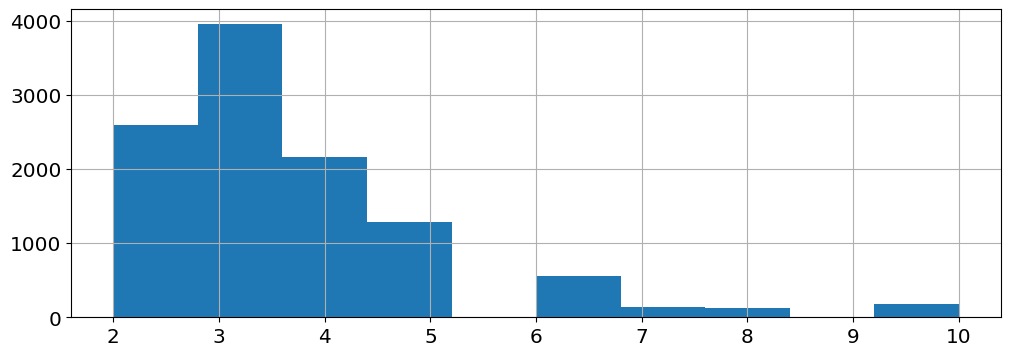

In [19]:
df['compras_anteriores'].hist()

<AxesSubplot:>

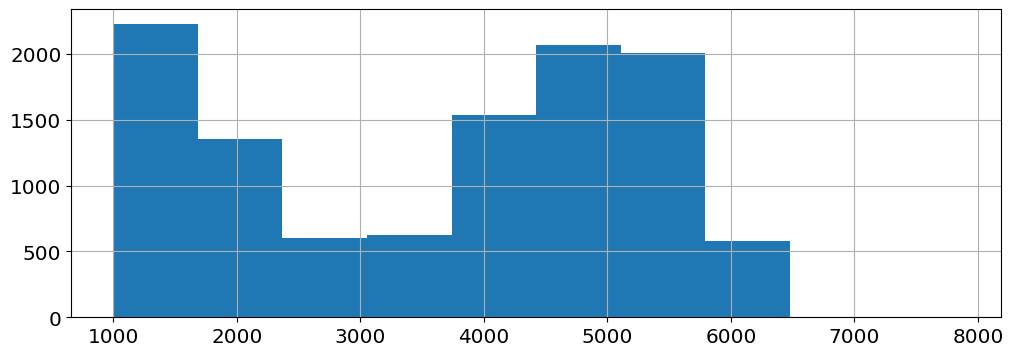

In [20]:
df['peso_gramas'].hist()

## Exploring the Categorical Variables

In [21]:
# Summary of the categorical variables
df[cats].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


In [22]:
# List the total by category
for col in cats:
    print(f'''Total of Category for Variable {col}:''')
    print(df[col].value_counts())
    print()

Total of Category for Variable corredor_armazem:
F    3666
D    1834
C    1834
A    1833
B    1833
Name: corredor_armazem, dtype: int64

Total of Category for Variable modo_envio:
Navio       7463
Aviao       1777
Caminhao    1760
Name: modo_envio, dtype: int64

Total of Category for Variable prioridade_produto:
baixa    5298
media    4754
alta      948
Name: prioridade_produto, dtype: int64

Total of Category for Variable genero:
F    5546
M    5454
Name: genero, dtype: int64



## Univariate Analysis - Box Plots
- plt.subplot() - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
- sns.boxplot() - https://seaborn.pydata.org/generated/seaborn.boxplot.html
- plt.tight_layout() - https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html#sphx-glr-tutorials-intermediate-tight-layout-guide-py

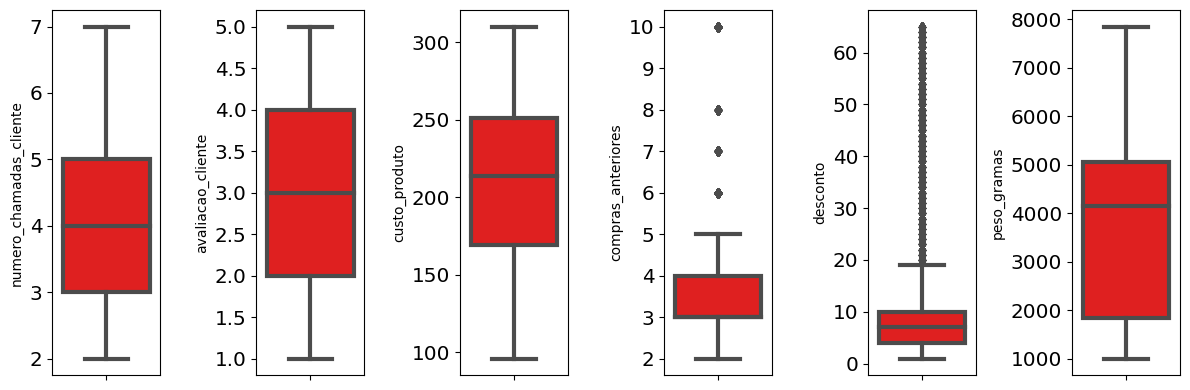

In [25]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = df[features[i]], color = 'red', orient = 'v')
    plt.tight_layout()

## Univariate Analysis - Dist Plots
- sns.histplot() - https://seaborn.pydata.org/generated/seaborn.histplot.html

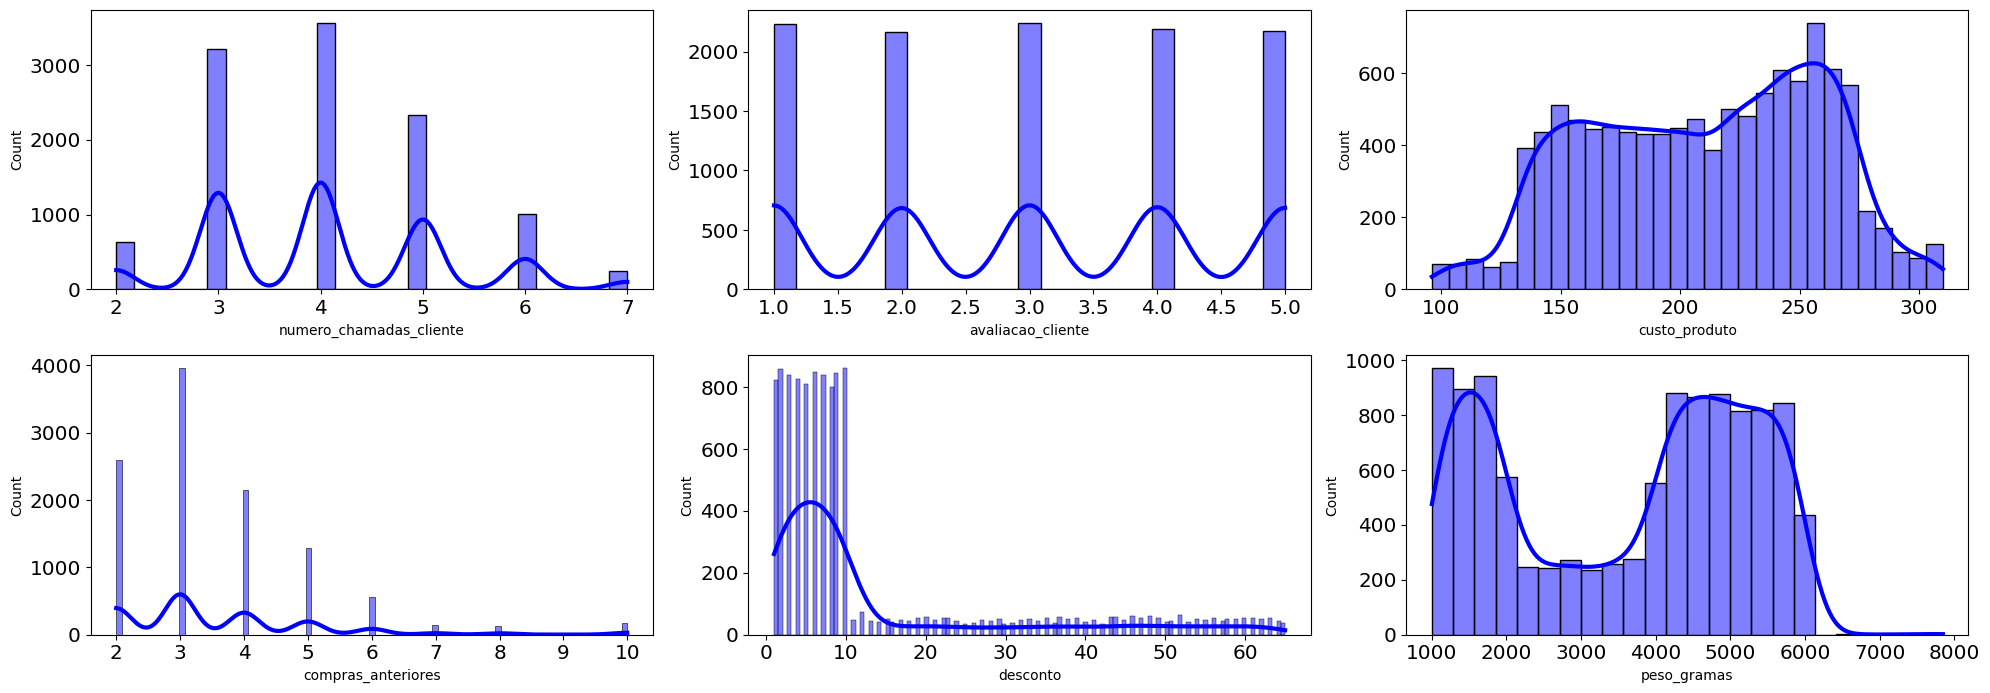

In [24]:
features = nums
plt.figure(figsize = (20, 10))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.histplot(x = df[features[i]], kde = True, color = 'blue')
    plt.xlabel(features[i])
    plt.tight_layout()

## Univariate Analysis - Violin Plots
- sns.violinplot() - https://seaborn.pydata.org/generated/seaborn.violinplot.html

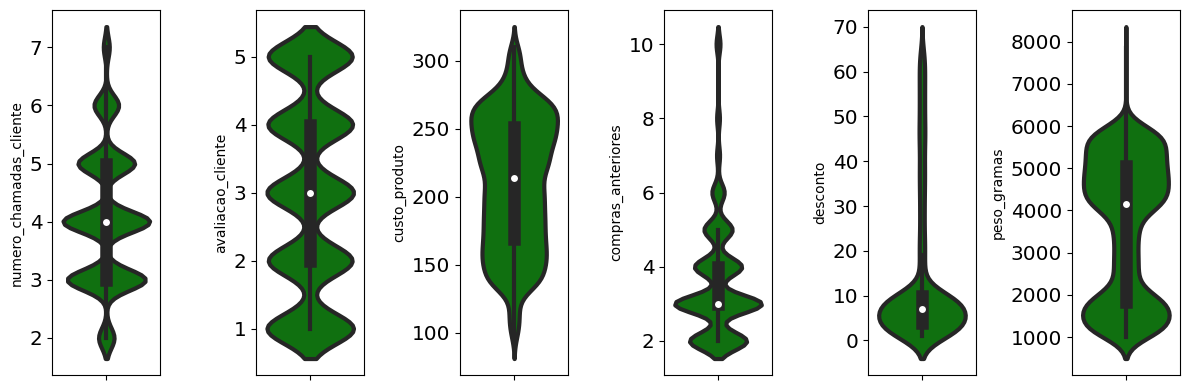

In [31]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y = df[nums[i]], color = 'green', orient = 'v')
    plt.tight_layout()

**From the graphs you can observe that:**
- The column `custo_produto` seems to be close to a normal distribution.
- As we suspect, the columns `compras_anteriores` and `desconto` are slightly inclined, which means that there is a possibility that we will need to do something with these columns later on. 
- For the column `peso_gramas` distribution uncertainty because it is shaped like a ‘U’.
- The columns `numero_chamadas_cliente` and `avaliação_cliente` are distributed uniformly.